In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('churn.csv')

In [3]:
df.head()
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [4]:
sns.set_style(style="whitegrid")
plt.figure(figsize=(12,10))

<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

Text(0.5, 1.0, 'Distribution of Churn')

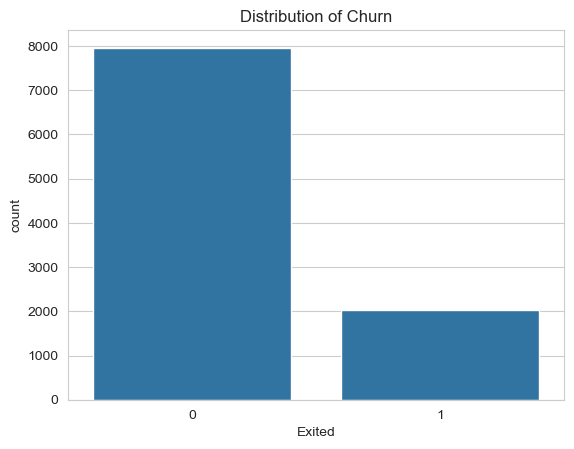

In [5]:
sns.countplot(x="Exited", data=df)
plt.title('Distribution of Churn')

# notice how there's an imbalance, would be important when it comes to overfititng/oversampling here

Text(0.5, 1.0, 'Age Distribution')

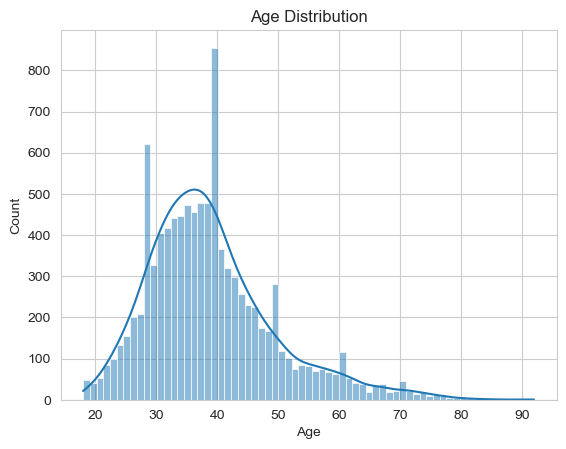

In [6]:
sns.histplot(data=df, x = "Age", kde=True) # kernel density estimate)
plt.title("Age Distribution")
# notice how there's a peak at 50/60, suggesting there's 2 distinct age groups

Text(0.5, 1.0, 'Credit Score vs Age')

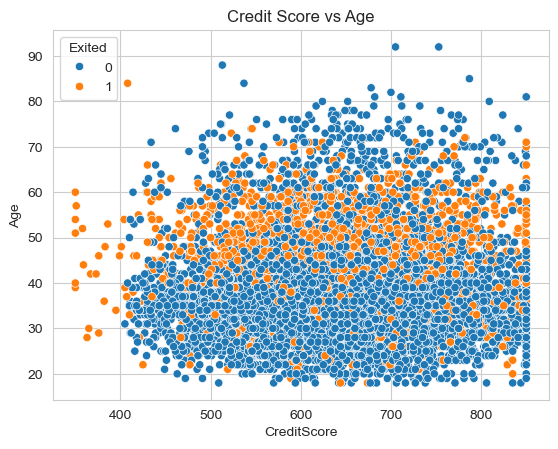

In [7]:
# scatter plot of customer churn
sns.scatterplot(data=df, x = "CreditScore", y = "Age", hue="Exited")
plt.title("Credit Score vs Age")
# suggests that customers who are older are more likely to churn

Text(0.5, 1.0, 'Balance Dist. by Churn')

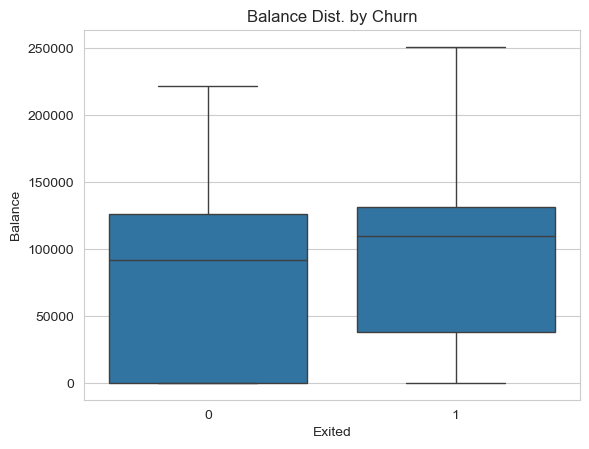

In [8]:
sns.boxplot(x="Exited", y="Balance", data=df)
plt.title("Balance Dist. by Churn")

Text(0.5, 1.0, 'CreditScore Dist. by Churn')

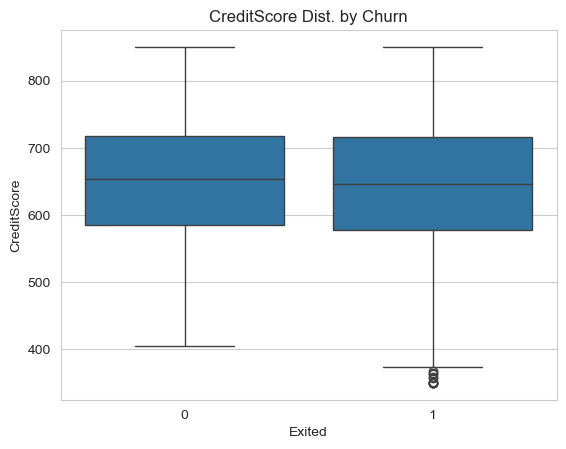

In [9]:
sns.boxplot(x="Exited", y="CreditScore", data=df)
plt.title("CreditScore Dist. by Churn")

# preprocessing the data

In [10]:
features = df.drop('Exited', axis=1) # dropping a col, not a row
# contains all the fts in the original df except for the target var

In [11]:
target = df['Exited'] # 1 = churn, 0 = not churn

In [12]:
features = features.drop(["RowNumber", "CustomerId", "Surname"], axis=1)
features

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [13]:
features = features.dropna() # drops rows with missing values
# no missing values in any row in this dataframe

In [14]:
# one hot encoding to convert categorical vars to binary
features = pd.get_dummies(features, columns=["Geography", "Gender"])
features

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,True,False,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,True,False,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,True,False,False,True,False
9998,772,42,3,75075.31,2,1,0,92888.52,False,True,False,False,True


now data has been pre-processing, we now want to split the data. 

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [16]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42) #allows u to reproduce the results

In [19]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test) # normalizes the data

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [24]:
lr_model = LogisticRegression(random_state=42)
# logistic regression model is a an S (sigmoid) shaped curve that maps any value to 0 or 1. 
# useful for binary classification problems
# lower values correspond to 0, higher values = 1.
# in the middle is more uncertain, small changes in input can lead to large changes in predicted probability

In [25]:
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [26]:
lr_predictions = lr_model.predict(X_test) # some light predictions
lr_predictions

array([0, 0, 0, ..., 0, 0, 0])

In [29]:
lr_accuracy = accuracy_score(y_test, lr_predictions)
print(lr_accuracy) # not bad, but could be better

0.811


In [ ]:
# XGBoost - best for tabular data, builds models sequentially and corrects the errors of previous models
# decision trees, random forest, naive bayes, k nearest neighbors, support vector machines